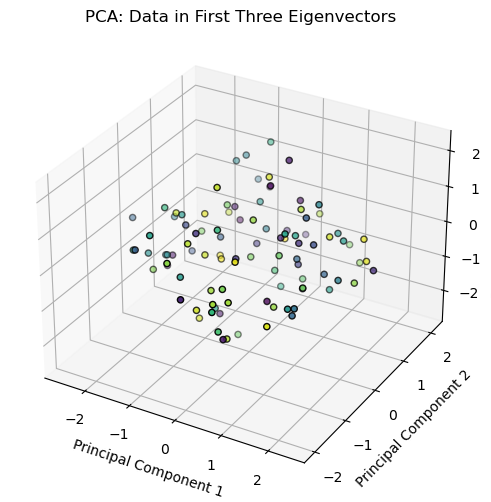

Eigenvalues: [1.27609288 0.96856926 0.75533787]
Eigenvectors:
[[-0.43433714 -0.82866333 -0.35308404]
 [-0.68471644  0.0490553   0.72715678]
 [ 0.58524751 -0.55759364  0.58870594]]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def pca(dataset):
    # Extract the Species column for future comparison
    species = dataset.iloc[:, -1]

    # Remove the Species column before PCA
    data = dataset.iloc[:, :-1]

    # Standardize the data
    standardized_data = (data - data.mean()) / data.std()

    # Compute the covariance matrix
    covariance_matrix = np.cov(standardized_data, rowvar=False)

    # Compute the eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvectors by decreasing eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    eigenvalues = eigenvalues[sorted_indices]

    # Select the first three eigenvectors
    selected_eigenvectors = eigenvectors[:, :3]

    # Project the data onto the first three eigenvectors
    projected_data = np.dot(standardized_data, selected_eigenvectors)

    # Plot the data in the first three eigenvectors
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(projected_data[:, 0], projected_data[:, 1], projected_data[:, 2], c=species, cmap='viridis', edgecolors='black')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('PCA: Data in First Three Eigenvectors')

    plt.show()

    return eigenvalues, selected_eigenvectors

# Example usage:
# Assuming 'dataset' is a Pandas DataFrame with features in columns 0 and 1
# and the last column 'Species' is the actual species labels
dataset = pd.DataFrame(np.random.rand(100, 4) * 10, columns=['Feature1', 'Feature2', 'Feature3', 'Species'])
eigenvalues, eigenvectors = pca(dataset)
print('Eigenvalues:', eigenvalues)
print('Eigenvectors:')
print(eigenvectors)
